# This Jupyter notebook compares results from MPEC and Optimal Solution.

### Here we campare system costs between two methods.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

## Loading MPEC results for each DA from 'Model_CVS'

In [64]:
print("Loading results from:")
files_path = os.path.realpath(os.path.join(os.path.abspath(''), "Model_CSV"))
print("\t",files_path)
files_name = 'Model_data_DA_'
append_name ="_20221021-185407"
ncda = 9
#Model_data_DA_1_20221021-185407
data = []
for j in range(1,ncda+1):
    path = os.path.join(files_path,files_name+str(j)+append_name+'.csv')
    #print("Reading file {} : {}".format(j,path))
    data.append(pd.read_csv(path))

Loading results from:
	 D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV


## Loading Matlab Linear code results

In [65]:
files_name = 'results_lin_comp_market_10-17-2022@20.41.xlsx'
lin_Competitive_Profit = pd.read_excel(files_name,'Competitive Profit', header=None)

## MPEC PROFIT / SYSTEM-COST: sum(Sell - Buy)*LMPs

In [66]:
da_loc = np.array([[0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0],
[1,1,1,0,0,0,0,0,0],
[0,0,0,1,1,1,0,0,0],
[0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0]])

bus_col = []
for i in range(1,7):
    bus_col.append('Bus'+str(i)+'_price')

MVA=30

bus_price = data[0][data[0].Iteration==1][bus_col].to_numpy().transpose()

da_sell_list=[]
for df in data:
    da_sell_list.append(df[df.Iteration==1]['DAs_generation\nE_DAs_G'].tolist())

da_buy_list=[]
for df in data:
    da_buy_list.append(df[df.Iteration==1]['DAs_load\nE_DAs_L'].tolist())

da_sell = np.array(da_sell_list)
da_buy  = np.array(da_buy_list)

price_mat = np.matmul(da_loc.T,bus_price)
amount_mat = da_sell*MVA-da_buy*MVA

Mpec_profit = np.multiply(amount_mat, price_mat)

In [67]:
Mpec_df = pd.DataFrame(Mpec_profit)

### Compare System Cost (DAs Costs) with Optimal System Costs

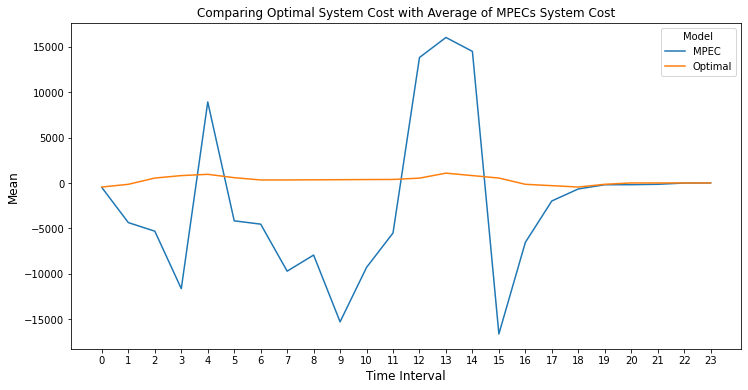

In [68]:
result= dict()
result['MPEC'] = Mpec_df.sum().to_list()
result['Optimal'] = lin_Competitive_Profit.sum().to_list()
result['Time'] = [x for x in range(24)]

result_df = pd.DataFrame(result)
result_df = result_df.melt(id_vars='Time',var_name='Model', value_name='Value')
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

sns.lineplot(data= result_df,  x='Time', y='Value', hue='Model')#hue='category'
axes.set(xticks=[x for x in range(24)]);
axes.set_title("Comparing Optimal System Cost with Average of MPECs System Cost", fontsize=12)
axes.set_xlabel('Time Interval',fontsize=12);
axes.set_ylabel('Mean',fontsize=12);

# Result of Total System Cost for EACH Model

In [69]:
result_df.groupby('Model').sum()

Time         Value
Model                      
MPEC      276 -51514.239109
Optimal   276   6314.264395

The above results shows that generaly, in the MPECs scenarios, total cost value for DAs participants are higher (Minus Value), comparing with optimal model system cost. 

In optimal solution, DAs have profit (Positive Value) from selling excess power.  

In [71]:
cost_mpecs   = result_df.groupby('Model').sum().Value[0]
cost_optimal = result_df.groupby('Model').sum().Value[1]
profit_percentage = abs(cost_optimal - cost_mpecs)/(abs(cost_optimal + cost_mpecs)/2)
print("Percentage of Difference between optimal system cost and MPECs average system cost:",profit_percentage*100,"%")

Percentage of Difference: 255.87847722874196 %


## Comparing Optimal System Cost with Each DA System Cost

In [60]:
result_df = Mpec_df.copy(deep=True)
result_df['Model'] = 'MPEC'
result_df['DA'] = ['DA'+str(x) for x in range(1,ncda+1)]
result_df.loc[len(result_df.index)] = lin_Competitive_Profit.sum().to_list() + ['Optimal', 'Optimal']

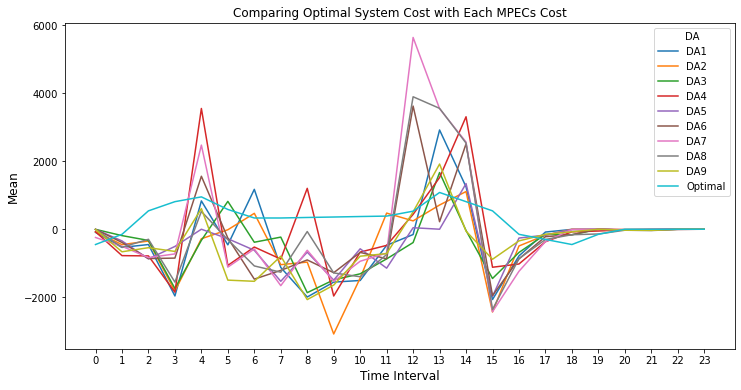

In [61]:
result_df =  result_df.melt(id_vars=['DA','Model'],var_name='Time', value_name='Cost')
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

sns.lineplot(data= result_df,  x='Time', y='Cost', hue='DA')#hue='category'
axes.set(xticks=[x for x in range(24)]);
axes.set_title("Comparing Optimal System Cost with Each MPECs Cost", fontsize=12)
axes.set_xlabel('Time Interval',fontsize=12);
axes.set_ylabel('Mean',fontsize=12);